In [1]:
import numpy as np
import pandas as pd
import matplotlib
import os
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from abc import ABCMeta, abstractmethod
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

## Linear Regression

#### Detailed process of how the features are selected, please look at the notebook(model_LR), following is the best model

In [2]:
def read_data(path):
    data = pd.read_csv(path)
    return data

In [3]:
path = os.path.realpath(os.path.join(os.getcwd() , '..', 'data_for_training', 'BEV_data_w_hpi.csv'))

In [4]:
data = read_data(path)
if "Unnamed: 0.1" in data.columns:
    data = data.drop(["Unnamed: 0.1"], axis = 1)

In [5]:
#  Description of the dataset
Description_data = {'Variable': ['zip code',
                                 'number_registration',
                                 'Population',
                                 'household count',
                                 '<10,000',
                                 '10,000~14,999',
                                 '15,000~24,999',
                                 '25,000~34,999',
                                 '35,000~49,999',
                                 '50,000~74,999',
                                 '75,000~99,999',
                                 '100,000~149,999',
                                 '150,000~199,999',
                                 '>200,000',
                                 'EV charging station number',
                                 'housing_price_index'],
                    
                    'Description': ['United States Zip Codes',
                                    'The number of electric vehicle registrations',
                                    'The number of Population',
                                    'The number of household',
                                    'The income less than \$10,000',
                                    'The income from \$10,000 to \$14,999',
                                    'The income from \$15,000 to \$24,999',
                                    'The income from \$25,000 to \$34,999',
                                    'The income from \$35,000 to \$49,999',
                                    'The income from \$50,000 to \$74,999',
                                    'The income from \$75,000 to \$99,999',
                                    'The income from \$100,000 to \$149,999',
                                    'The income from \$150,000 to \$199,999',
                                    'The income more than \$200,000',
                                    'EV charging station number',
                                    'housing price index'
                                   ]}

Description_table = pd.DataFrame(data=Description_data, index=['zip code',
                                                               'number_registration',
                                                               'Population',
                                                               'household count',
                                                               '<10,000',
                                                               '10,000~14,999',
                                                               '15,000~24,999',
                                                               '25,000~34,999',
                                                               '35,000~49,999',
                                                               '50,000~74,999',
                                                               '75,000~99,999',
                                                               '100,000~149,999',
                                                               '150,000~199,999',
                                                               '>200,000',
                                                               'EV charging station number',
                                                               'housing_price_index'])
Description_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])

,Variable,Description
zip code,zip code,United States Zip Codes
number_registration,number_registration,The number of electric vehicle registrations
Population,Population,The number of Population
household count,household count,The number of household
"<10,000","<10,000","The income less than \$10,000"
"10,000~14,999","10,000~14,999","The income from \$10,000 to \$14,999"
"15,000~24,999","15,000~24,999","The income from \$15,000 to \$24,999"
"25,000~34,999","25,000~34,999","The income from \$25,000 to \$34,999"
"35,000~49,999","35,000~49,999","The income from \$35,000 to \$49,999"
"50,000~74,999","50,000~74,999","The income from \$50,000 to \$74,999"


In [6]:
data.columns = [
'Zip_code',
'Number_registration',
'Population',
'Household_count',
'Less_than_10000',
'10000to14999',
'15000to24999',
'25000to34999',
'35000to49999',
'50000to74999',
'75000to99999',
'100000to149999',
'150000to199999',
'More_than_200000',
'EV_charging_station_number',
'Housing_price_index']

In [7]:
data.corr()

,Zip_code,Number_registration,Population,Household_count,Less_than_10000,10000to14999,15000to24999,25000to34999,35000to49999,50000to74999,75000to99999,100000to149999,150000to199999,More_than_200000,EV_charging_station_number,Housing_price_index
Zip_code,1.000000,-0.560675,-0.274067,-0.307336,0.172310,0.207461,0.374355,0.351308,0.319722,0.216820,-0.079457,-0.340045,-0.438706,-0.443717,-0.248258,-0.556051
Number_registration,-0.560675,1.000000,0.667800,0.710470,-0.190113,-0.330070,-0.427181,-0.432270,-0.443963,-0.404947,0.052155,0.396289,0.628389,0.704902,0.417548,0.816300
Population,-0.274067,0.667800,1.000000,0.982454,-0.023831,-0.204565,-0.159393,-0.167895,-0.211256,-0.174889,0.133700,0.166918,0.266496,0.224121,0.258704,0.668722
Household_count,-0.307336,0.710470,0.982454,1.000000,-0.001950,-0.193053,-0.156807,-0.176619,-0.228123,-0.206830,0.112308,0.166539,0.280854,0.254496,0.334510,0.719770
Less_than_10000,0.172310,-0.190113,-0.023831,-0.001950,1.000000,0.301747,0.437142,0.246241,0.003324,-0.218999,-0.211997,-0.359535,-0.370015,-0.276957,0.121224,-0.058866
10000to14999,0.207461,-0.330070,-0.204565,-0.193053,0.301747,1.000000,0.463554,0.272347,0.133087,-0.080471,-0.182824,-0.483755,-0.401137,-0.365410,-0.039394,-0.243117
15000to24999,0.374355,-0.427181,-0.159393,-0.156807,0.437142,0.463554,1.000000,0.401396,0.326289,0.028941,-0.298700,-0.633605,-0.577593,-0.509545,-0.103129,-0.313299
25000to34999,0.351308,-0.432270,-0.167895,-0.176619,0.246241,0.272347,0.401396,1.000000,0.333483,0.176920,-0.299535,-0.569441,-0.505113,-0.513768,-0.150369,-0.337624
35000to49999,0.319722,-0.443963,-0.211256,-0.228123,0.003324,0.133087,0.326289,0.333483,1.000000,0.202819,-0.313543,-0.493065,-0.478091,-0.445591,-0.193813,-0.336723
50000to74999,0.216820,-0.404947,-0.174889,-0.206830,-0.218999,-0.080471,0.028941,0.176920,0.202819,1.000000,-0.089364,-0.166056,-0.443383,-0.459670,-0.210714,-0.308421


In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# The dataframe passed to VIF must include the intercept term. We add it the same way we did before.
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

In [9]:
y = data["Number_registration"]
X = data.drop(['Number_registration'], axis =1).fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

In [10]:
# Import the library that contains all the functions/modules related to the regression model
import statsmodels.api as sm
# Choose the features to be used
subcols_More_than_200000_Household_count_150000to199999= [
# 'Zip_code',
'Population',
#'Household_count',
'Less_than_10000',
'10000to14999',
'15000to24999',
'25000to34999',
'35000to49999',
'50000to74999',
'75000to99999',
'100000to149999',
#'150000to199999',
#'More_than_200000',
'EV_charging_station_number',
'Housing_price_index']

# y = data["Number_registration"]
# X = data.drop(['Number_registration',"Zip_code" ], axis =1).fillna(0)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

X_train= X_train[subcols_More_than_200000_Household_count_150000to199999]
X_test = X_test[subcols_More_than_200000_Household_count_150000to199999]
# We must add an intercept as the standard model doesn't automatically fit one
X_train = sm.add_constant(X_train)

# Fit the data to the model
model_More_than_200000_Household_count_150000to199999= sm.OLS(y_train, X_train).fit() #ordinary least square
print(model_More_than_200000_Household_count_150000to199999.summary())
print('After remove More_than_200000,we get VIFs:')
print(VIF(data,subcols_More_than_200000_Household_count_150000to199999))

                             OLS Regression Results                            
Dep. Variable:     Number_registration   R-squared:                       0.841
Model:                             OLS   Adj. R-squared:                  0.835
Method:                  Least Squares   F-statistic:                     129.5
Date:                 Sat, 03 Dec 2022   Prob (F-statistic):          1.29e-100
Time:                         11:39:57   Log-Likelihood:                -1650.7
No. Observations:                  281   AIC:                             3325.
Df Residuals:                      269   BIC:                             3369.
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const     

## Regression Tree

In [11]:
data = read_data(path)
if "Unnamed: 0.1" in data.columns:
    data = data.drop(["Unnamed: 0.1"], axis = 1)

In [12]:
y = data["number_registration"]
X = data.drop(['number_registration',"zip code" ], axis =1).fillna(0)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=88)

In [13]:
grid_values = {'ccp_alpha': np.linspace(0, 1, 2001),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]}

            
dtr = DecisionTreeRegressor()
dtr_cv_acc = GridSearchCV(dtr, param_grid = grid_values, cv=10, verbose=0, scoring = 'r2')
dtr = dtr_cv_acc.fit(X_train, y_train)

In [14]:
def OSR2(model, X_test, y_test, y_train):
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
    return (1- SSE/SST)

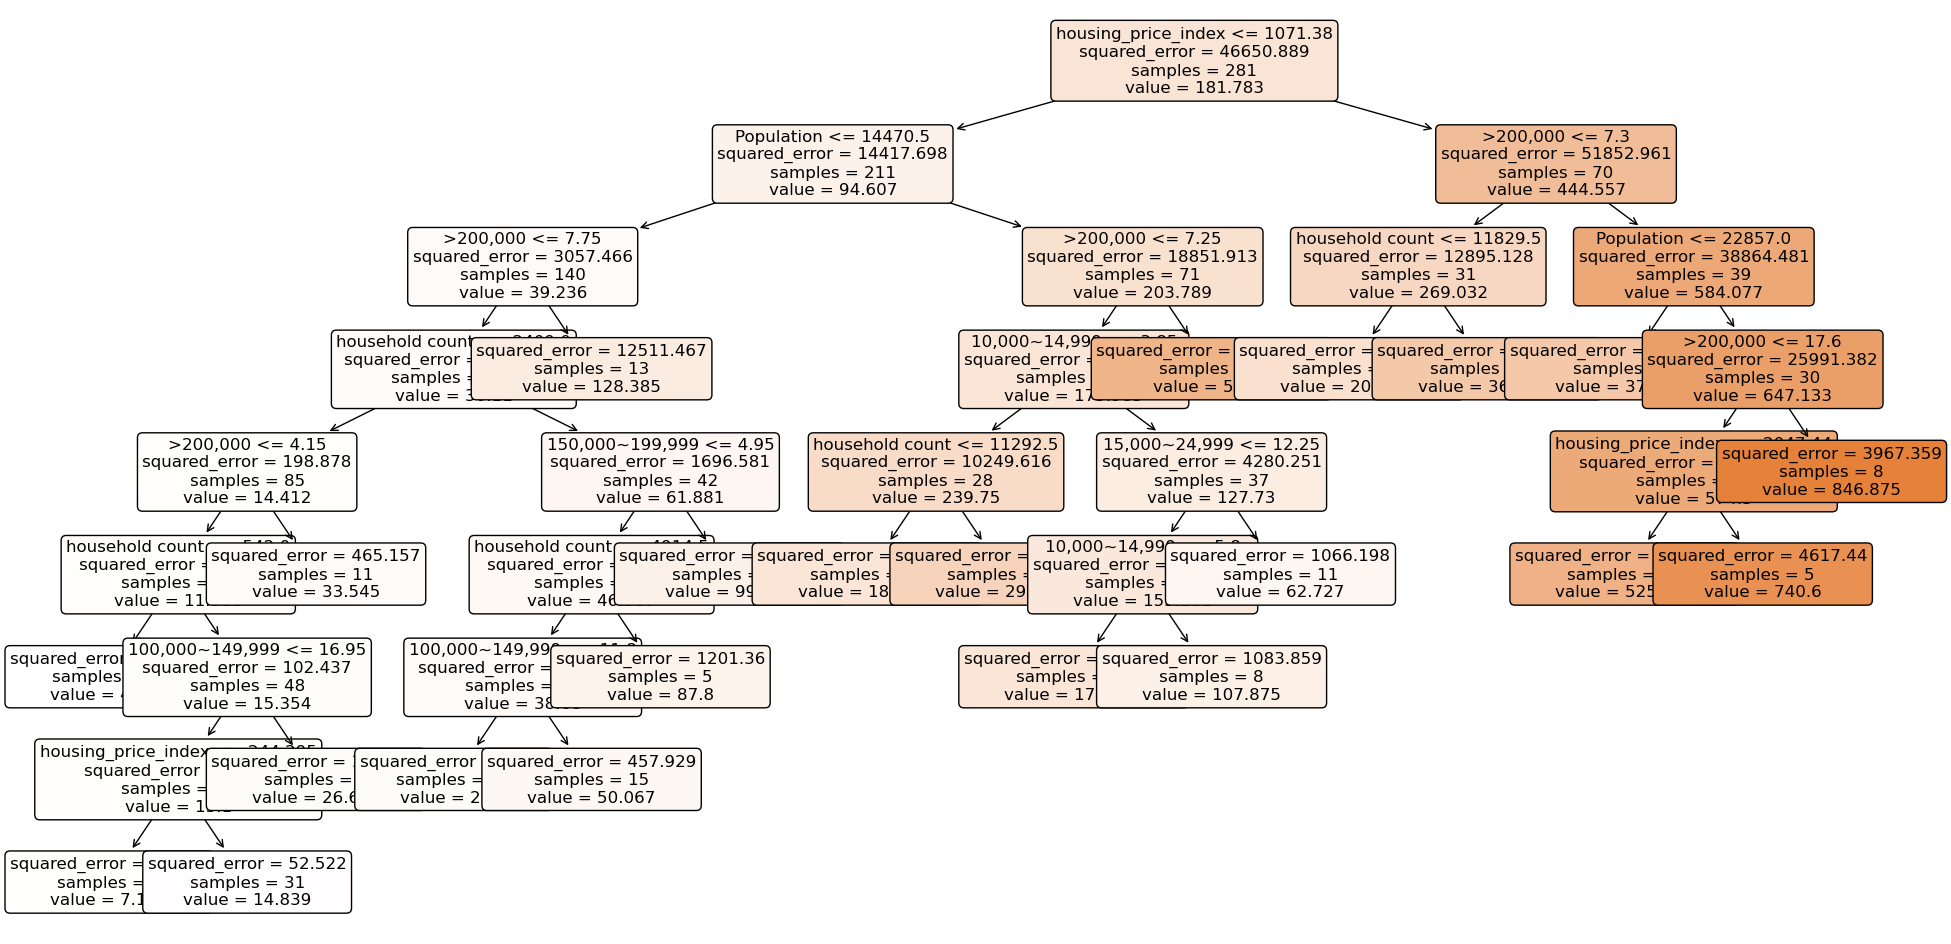

In [15]:
plt.figure(figsize=(24,12))
plot_tree(dtr_cv_acc.best_estimator_, 
          feature_names=X_train.columns,
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12) #,max_depth=3)   # how deep to show
plt.show()

In [16]:
print("Regression Tree OSR2: ",OSR2(dtr, X_test, y_test, y_train))

Regression Tree OSR2:  0.8090644387025876


# Boosting

In [17]:
path = os.path.realpath(os.path.join(os.getcwd() , '..', 'data_for_training', 'BEV_data_w_hpi.csv'))

In [18]:
data = read_data(path)
if "Unnamed: 0.1" in data.columns:
    data = data.drop(["Unnamed: 0.1"], axis = 1)

In [19]:
y = data["number_registration"]
X = data.drop(['number_registration',"zip code" ], axis =1).fillna(0)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=88)

In [20]:
boosting = GradientBoostingRegressor(random_state=88)
boosting.fit(X_train, y_train)
print("OSR2: ",OSR2(boosting, X_test, y_test, y_train))

OSR2:  0.9129423703112861


### Classification Tree 

In [21]:
bev_data = data.copy(deep=True)

In [22]:
bev_data['class'] = np.zeros(len(bev_data))
for i in range(len(bev_data)):
    if bev_data['number_registration'][i] < 50:
        bev_data['class'][i] = 'A'
    
    elif bev_data['number_registration'][i] < 200:
        bev_data['class'][i] = 'B'
    elif bev_data['number_registration'][i] < 400:
        bev_data['class'][i] = 'C'
    else:
        bev_data['class'][i] = 'D'

/var/folders/hd/7mhwbm312jd2fp_tb35yjgvc0000gn/T/ipykernel_4849/3867495291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bev_data['class'][i] = 'A'


In [23]:
y = bev_data['class']
X = bev_data.drop(['class', 'zip code', 'number_registration'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 88)

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

dtc = DecisionTreeClassifier(class_weight = 'balanced',
                             min_samples_leaf= 3,
                             min_samples_split= 2,
                              random_state = 88)
cv = KFold(n_splits= 10, random_state= 88, shuffle = True)
grid_values = {'ccp_alpha': np.linspace(0,1,2001)}

dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv=cv, verbose=0)


dtc_cv_acc = dtc_cv_acc.fit(X_train, y_train)

y_pred = dtc_cv_acc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm) 
print('Precision:',precision_score(y_test, y_pred, average = 'weighted'))
print('Recall:',recall_score(y_test, y_pred, average = 'weighted'))

acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])

Confusion Matrix : 
 [[42  4  0  0]
 [10 22  7  1]
 [ 0  4 10  3]
 [ 0  0  2 16]]
Precision: 0.7424342802333234
Recall: 0.743801652892562


/var/folders/hd/7mhwbm312jd2fp_tb35yjgvc0000gn/T/ipykernel_4849/2264077292.py:26: RuntimeWarning: invalid value encountered in long_scalars
  TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])


In [25]:
model_acc = dtc_cv_acc.best_score_ # TODO: calculate CV CART accuracy
print(f'CART Best Accuracy: {model_acc:.4f}')

CART Best Accuracy: 0.7187


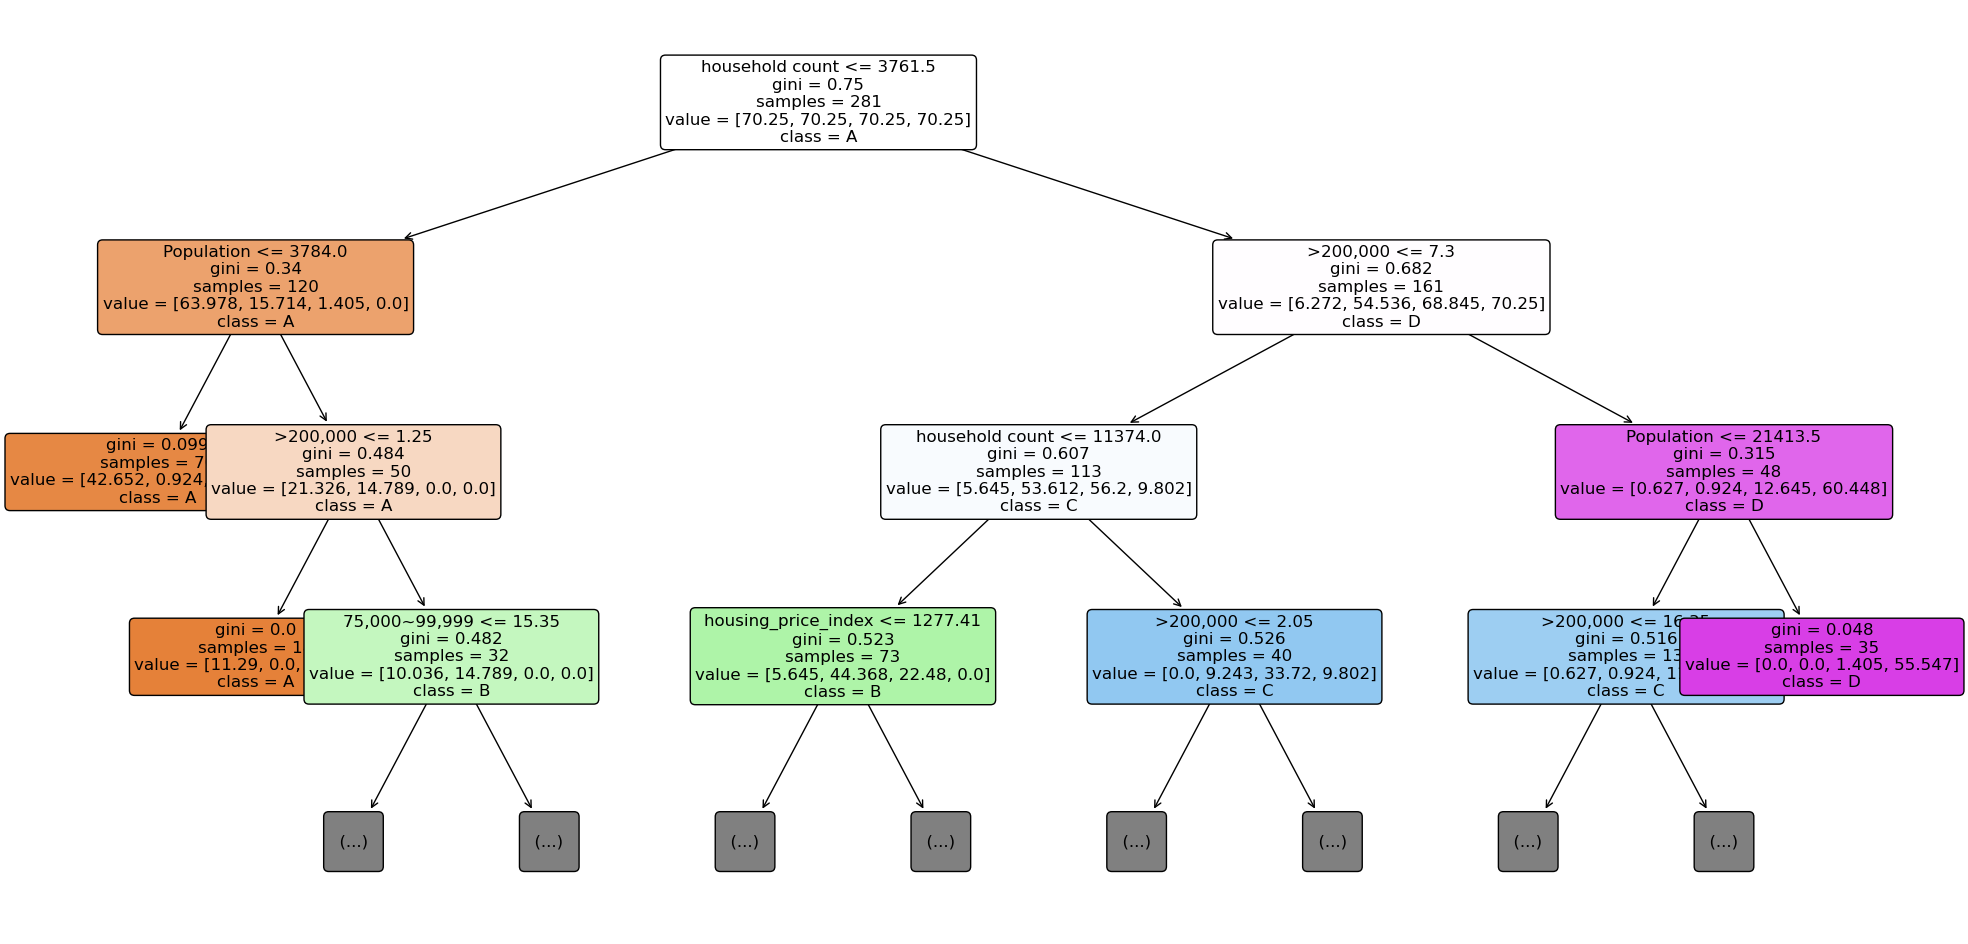

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,12))
plot_tree(dtc_cv_acc.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['A','B','C','D'], 
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12,
          max_depth=3)
plt.show()

# CART BASELINE

In [27]:
ev_sales = pd.read_csv("../data_for_training/BEV_data_w_hpi.csv")

In [28]:
def OSR2(model, x_test, y_test, y_train): 
    y_pred = model.predict(x_test) 
    SSE = np.sum((y_test - y_pred)**2) 
    SST = np.sum((y_test - np.mean(y_train))**2) 

    return (1 - SSE/SST)

In [29]:
from sklearn.model_selection import train_test_split

y = ev_sales["number_registration"]
X = pd.get_dummies(ev_sales.drop(["number_registration","zip code"],axis=1)) 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88) 
x_train.shape, x_test.shape

((281, 14), (121, 14))

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold 

grid_values = {"ccp_alpha": np.linspace(0, 0.001, 51)}

dtr = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20, random_state=88)

cv = KFold(n_splits=5, random_state=1, shuffle=True) 

dtr_cv = GridSearchCV(dtr, param_grid=grid_values, scoring='r2', cv=cv, verbose=0) 
dtr_cv.fit(x_train, y_train)
print(dtr_cv)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                             min_samples_split=20,
                                             random_state=88),
             param_grid={'ccp_alpha': array([0.0e+00, 2.0e-05, 4.0e-05, 6.0e-05, 8.0e-05, 1.0e-04, 1.2e-04,
       1.4e-04, 1.6e-04, 1.8e-04, 2.0e-04, 2.2e-04, 2.4e-04, 2.6e-04,
       2.8e-04, 3.0e-04, 3.2e-04, 3.4e-04, 3.6e-04, 3.8e-04, 4.0e-04,
       4.2e-04, 4.4e-04, 4.6e-04, 4.8e-04, 5.0e-04, 5.2e-04, 5.4e-04,
       5.6e-04, 5.8e-04, 6.0e-04, 6.2e-04, 6.4e-04, 6.6e-04, 6.8e-04,
       7.0e-04, 7.2e-04, 7.4e-04, 7.6e-04, 7.8e-04, 8.0e-04, 8.2e-04,
       8.4e-04, 8.6e-04, 8.8e-04, 9.0e-04, 9.2e-04, 9.4e-04, 9.6e-04,
       9.8e-04, 1.0e-03])},
             scoring='r2')


[0.0 2e-05 4e-05 6.000000000000001e-05 8e-05 0.0001 0.00012000000000000002
 0.00014000000000000001 0.00016 0.00018 0.0002 0.00022
 0.00024000000000000003 0.00026000000000000003 0.00028000000000000003
 0.00030000000000000003 0.00032 0.00034 0.00036 0.00038 0.0004 0.00042
 0.00044 0.00046 0.00048000000000000007 0.0005 0.0005200000000000001
 0.00054 0.0005600000000000001 0.00058 0.0006000000000000001 0.00062
 0.00064 0.0006600000000000001 0.00068 0.0007000000000000001 0.00072
 0.0007400000000000001 0.00076 0.0007800000000000001 0.0008
 0.0008200000000000001 0.00084 0.0008600000000000001 0.00088
 0.0009000000000000001 0.00092 0.0009400000000000001 0.0009600000000000001
 0.0009800000000000002 0.001]
[0.67646114 0.67646114 0.67646114 0.67646114 0.67646114 0.67646114
 0.67646114 0.67646114 0.67646114 0.67646114 0.67646114 0.67646114
 0.67646114 0.67646114 0.67646114 0.67646114 0.67646114 0.67646114
 0.67646114 0.67646114 0.67646114 0.67646114 0.67646114 0.67646114
 0.67646114 0.67646114 0.676

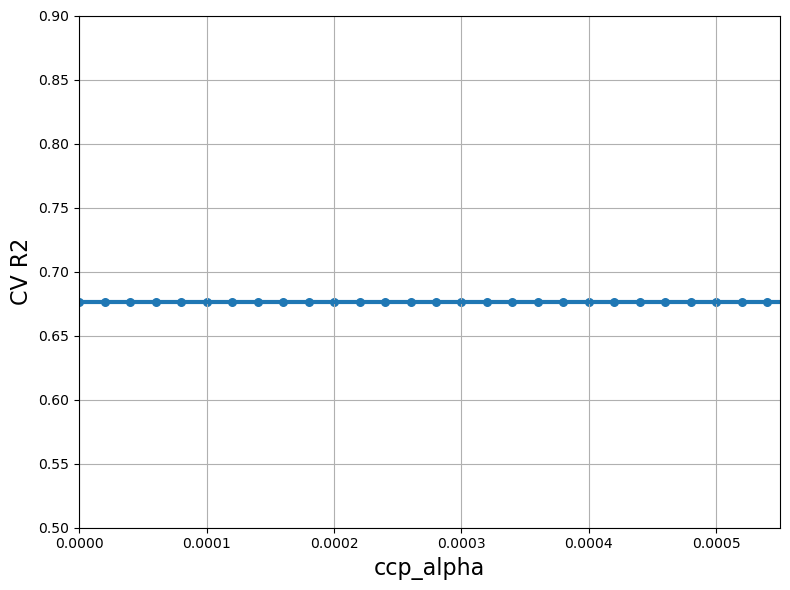

In [31]:
ccp_alpha = dtr_cv.cv_results_['param_ccp_alpha'].data 
print(ccp_alpha)
R2_scores = dtr_cv.cv_results_['mean_test_score'] 
print(R2_scores)

plt.figure(figsize=(8,6)) 
plt.xlabel('ccp_alpha', fontsize=16) 
plt.ylabel('CV R2', fontsize=16) 
plt.scatter(ccp_alpha, R2_scores, s=30)
plt.plot(ccp_alpha, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 0.00055])
plt.ylim([0.5, 0.9])

plt.tight_layout()
plt.show()

In [32]:
print('Best ccp_alpha', dtr_cv.best_params_)

Best ccp_alpha {'ccp_alpha': 0.0}


In [33]:
#Model Evaluation 

print('Cross-validated R2:', round(dtr_cv.best_score_,5))
print('OSR2:', round(OSR2(dtr_cv, x_test, y_test, y_train), 5))

Cross-validated R2: 0.67646
OSR2: 0.80895


##  Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor 

rf = RandomForestRegressor(max_features=5, min_samples_leaf=5, 
                            n_estimators = 500, random_state=88, verbose=2)

rf.fit(x_train, y_train)

building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 84 of 500
building tree 85 of 500
building tree 86 of 500
building tree 87 of 500
building tree 88 of 500
building tree 89 of 500
building tree 90 of 500
building tree 91 of 500
building tree 92 of 500
building tree 93 of 500
building tree 94 of 500
building tree 95 of 500
building tree 96 of 500
building tree 97 of 500
building tree 98 of 500
building tree 99 of 500
building tree 100 of 500
building tree 101 of 500
building tree 102 of 500
building tree 103 of 500
building tree 104 of 500
building tree 105 of 500
building tree 106 of 500
building tree 107 of 500
building tree 108 of 500
building tree 109 of 500
building tree 110 of 500
building tree 111 of 500
building tree 112 of 500
building tree 113 of 500
building tree 114 of 500
building tree 115 of 500
building tree 116 of 500
building tree 117 of 500
building tree 118 of 500
building tree 119 of 500
building tree 120 of 500
building tree 121 of 500
building tree 122 of 500
building tree 123 of 500
building tree 12

building tree 487 of 500
building tree 488 of 500
building tree 489 of 500
building tree 490 of 500
building tree 491 of 500
building tree 492 of 500
building tree 493 of 500
building tree 494 of 500
building tree 495 of 500
building tree 496 of 500
building tree 497 of 500
building tree 498 of 500
building tree 499 of 500
building tree 500 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished


RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators=500,
                      random_state=88, verbose=2)

In [35]:
rf.verbose = False

print('OSR2:', round(OSR2(rf, x_test, y_test, y_train), 5))

OSR2: 0.90089


In [36]:
pd.DataFrame({'Feature': x_train.columns, 
                'Importance score': 100*rf.feature_importances_}).round(1)

,Feature,Importance score
0,Population,15.1
1,household count,18.9
2,"<10,000",0.4
3,"10,000~14,999",0.8
4,"15,000~24,999",1.3
5,"25,000~34,999",2.9
6,"35,000~49,999",3.6
7,"50,000~74,999",2.7
8,"75,000~99,999",1.2
9,"100,000~149,999",1.5


In [37]:
## Using GridSearchCV to find best max_features 

import time 

grid_values = {'max_features': np.linspace(1,18,18, dtype='int32'), 
                'min_samples_leaf': [5],
                'n_estimators': [500], 
                'random_state': [88]} 

time0 = time.time()

rf2 = RandomForestRegressor()

cv = KFold(n_splits=5, random_state=333, shuffle=True) 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='r2', cv=cv, verbose=2) 
rf_cv.fit(x_train, y_train) 

time1 = time.time()

print('time:', round(time1-time0, 2), 's')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.5s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.4s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.4s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.5s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.4s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.4s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.4s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.4s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.4s
[CV] END max_features=2, min_samples_leaf=5, n_e

[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.1s
[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.1s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.1s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.1s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.1s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.1s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.1s


/Users/rich1999/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/rich1999/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/rich1999/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/rich1999/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iter

time: 39.12 s


[1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18]
[0.78851729 0.84660658 0.86452522 0.87088066 0.87425111 0.87168086
 0.87288996 0.87146969 0.86929908 0.86770868 0.86553493 0.8625417
 0.86127429 0.85921783        nan        nan        nan        nan]


(0.7, 0.9)

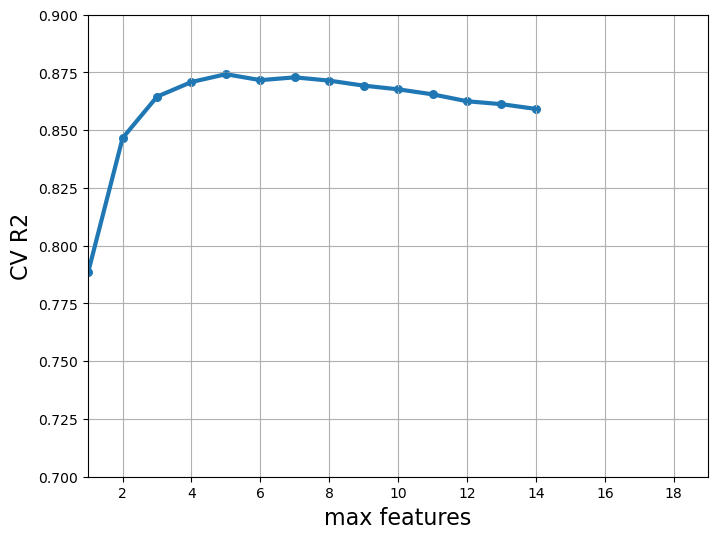

In [38]:
max_features = rf_cv.cv_results_['param_max_features'].data 
print(max_features)
R2_scores = rf_cv.cv_results_['mean_test_score']
print(R2_scores)

plt.figure(figsize=(8,6)) 
plt.xlabel('max features', fontsize=16) 
plt.ylabel('CV R2', fontsize=16) 
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([1, 19])
plt.ylim([0.7, 0.9])

In [39]:
print(rf_cv.best_params_)

{'max_features': 5, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}


In [40]:
# Evaluate model performance 
print('Cross-validated R2:', round(rf_cv.best_score_, 5)) 
print('OSR2:', round(OSR2(rf_cv, x_test,y_test,y_train), 5))

Cross-validated R2: 0.87425
OSR2: 0.90089


In [41]:
pd.DataFrame({'Feature': x_train.columns, 
                'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1)

,Feature,Importance score
0,Population,15.1
1,household count,18.9
2,"<10,000",0.4
3,"10,000~14,999",0.8
4,"15,000~24,999",1.3
5,"25,000~34,999",2.9
6,"35,000~49,999",3.6
7,"50,000~74,999",2.7
8,"75,000~99,999",1.2
9,"100,000~149,999",1.5


<BarContainer object of 14 artists>

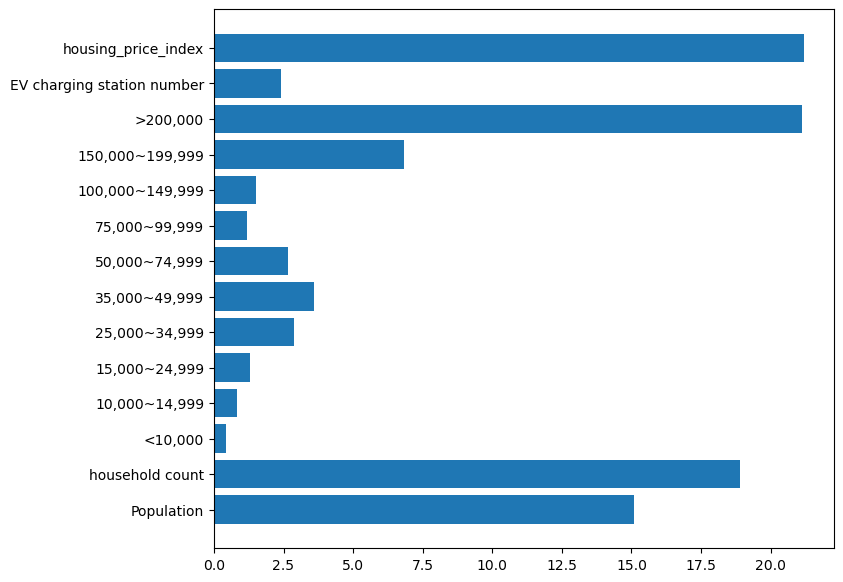

In [42]:
#visualize feature importances 

plt.figure(figsize=(8,7))
plt.barh(x_train.columns, 100*rf_cv.best_estimator_.feature_importances_)

# Boostrap Testing

In [43]:
def read_data(path):
    data = pd.read_csv(path)
    return data
path = os.path.realpath(os.path.join(os.getcwd() , '..', 'data_for_training', 'BEV_data_w_hpi.csv'))
data = read_data(path)
if "Unnamed: 0.1" in data.columns:
    data = data.drop(["Unnamed: 0.1"], axis = 1)
y = data["number_registration"]
X = data.drop(['number_registration',"zip code" ], axis =1).fillna(0)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=88)

In [44]:
def OSR2(model, x_test, y_test, y_train): 
    y_pred = model.predict(x_test) 
    SSE = np.sum((y_test - y_pred)**2) 
    SST = np.sum((y_test - np.mean(y_train))**2) 

    return (1 - SSE/SST)

In [45]:
from sklearn.metrics import accuracy_score
def perform_bootstrap(test_data, test_label, model,y_train, sample=500, random_state=88):# FILL IN ARGUMENTS) -> dict: 
    n_sample = sample
#     accuracy_array=np.zeros(n_sample)
#     accuracy_array[:]=np.nan
#     TPR_array = np.zeros(n_sample)
#     TPR_array[:] = np.nan
#     FPR_array = np.zeros(n_sample)
#     FPR_array[:]=np.nan
    boosting_array = np.zeros(n_sample)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True) 
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
#         bs_predicted = model.predict(bs_data)
        temp_OSR2 = OSR2(model, bs_data,bs_label,y_train)
#         temp_OSR2 = OSR2(model, x_test,y_test,y_train)
        boosting_array[bs_iter] = temp_OSR2
#         accuracy_array[bs_iter]=accuracy_score(bs_label, bs_predicted)
#         cm = confusion_matrix(bs_label, bs_predicted)
#         tn, fp, fn, tp = cm.ravel()
#         TPR_array[bs_iter]= (tp)/(tp+fn)
#         FPR_array[bs_iter] = (fp)/(tn+fp)
    boosting_df = pd.DataFrame(boosting_array)
    return boosting_df

In [46]:
boosting_OSR2_df =perform_bootstrap(X_test, y_test, boosting, y_train,
                          sample = 500)

In [47]:
def draw_performance_histogram(data, name):
    plt.figure()
    plt.hist(data, label=name)
    plt.legend()
    plt.show() 

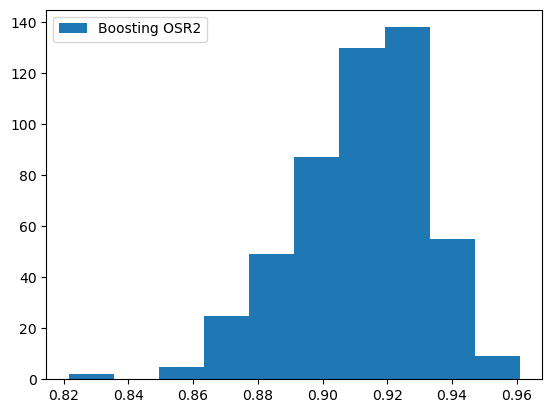

In [48]:
draw_performance_histogram(boosting_OSR2_df, "Boosting OSR2")

In [49]:
decision_tree_regressor_OSR2_df =perform_bootstrap(X_test, y_test, dtr_cv_acc, y_train,
                          sample = 500)

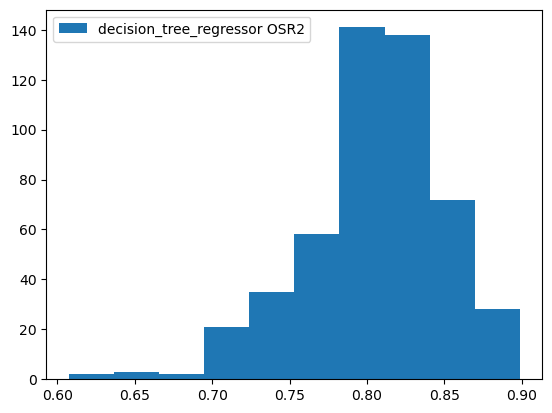

In [50]:
draw_performance_histogram(decision_tree_regressor_OSR2_df, "decision_tree_regressor OSR2")

In [51]:
random_forest_regressor_OSR2_df =perform_bootstrap(X_test, y_test, rf_cv, y_train,
                          sample = 500)

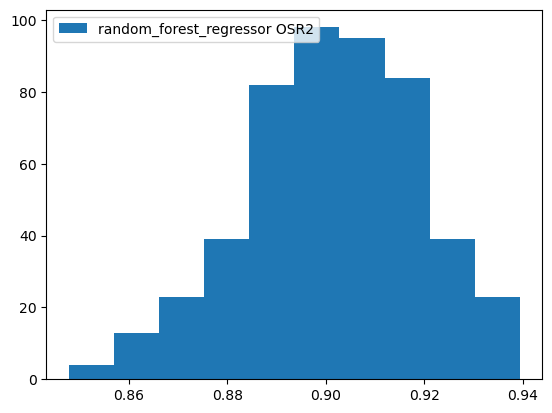

In [52]:
draw_performance_histogram(random_forest_regressor_OSR2_df, "random_forest_regressor OSR2")

In [53]:
data = read_data(path)
if "Unnamed: 0.1" in data.columns:
    data = data.drop(["Unnamed: 0.1"], axis = 1)
    

In [54]:
data.columns = [
'Zip_code',
'Number_registration',
'Population',
'Household_count',
'Less_than_10000',
'10000to14999',
'15000to24999',
'25000to34999',
'35000to49999',
'50000to74999',
'75000to99999',
'100000to149999',
'150000to199999',
'More_than_200000',
'EV_charging_station_number',
'Housing_price_index']

In [55]:
y = data["Number_registration"]
X = data.drop(['Number_registration'], axis =1).fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

In [56]:
# Import the library that contains all the functions/modules related to the regression model
import statsmodels.api as sm
# Choose the features to be used
subcols_More_than_200000_Household_count_150000to199999= [
# 'Zip_code',
'Population',
#'Household_count',
'Less_than_10000',
'10000to14999',
'15000to24999',
'25000to34999',
'35000to49999',
'50000to74999',
'75000to99999',
'100000to149999',
#'150000to199999',
#'More_than_200000',
'EV_charging_station_number',
'Housing_price_index']

# y = data["Number_registration"]
# X = data.drop(['Number_registration',"Zip_code" ], axis =1).fillna(0)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

X_train= X_train[subcols_More_than_200000_Household_count_150000to199999]
X_test = X_test[subcols_More_than_200000_Household_count_150000to199999]
X_train = sm.add_constant(X_train)

In [57]:
X_test = sm.add_constant(X_test)

In [58]:
linear_regression_OSR2_df = perform_bootstrap(X_test, y_test, model_More_than_200000_Household_count_150000to199999, y_train,
                          sample = 500)

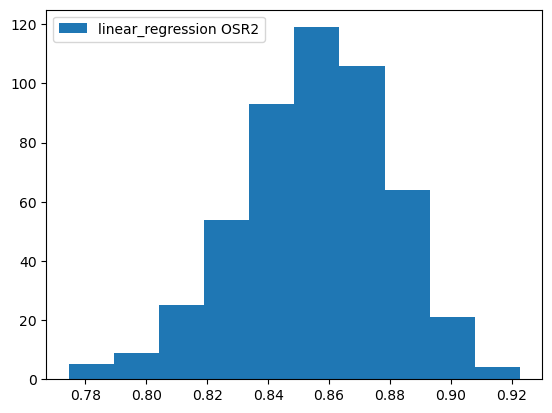

In [59]:
draw_performance_histogram(linear_regression_OSR2_df, "linear_regression OSR2")

In [60]:
from sklearn.metrics import accuracy_score
def perform_bootstrap_classfication(test_data, test_label, model, sample=500, random_state=88):# FILL IN ARGUMENTS) -> dict: 
        n_sample = sample
        accuracy_array=np.zeros(n_sample)
        accuracy_array[:]=np.nan
        TPR_array = np.zeros(n_sample)
        TPR_array[:] = np.nan
        FPR_array = np.zeros(n_sample)
        FPR_array[:]=np.nan
        for bs_iter in range(n_sample):
            bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True) 
            print(bs_index)
            bs_data = test_data.loc[bs_index]
            bs_label = test_label.loc[bs_index]
            bs_predicted = model.predict(bs_data) 
            accuracy_array[bs_iter]=accuracy_score(bs_label, bs_predicted)
            cm = confusion_matrix(bs_label, bs_predicted)
#             tn, fp, fn, tp = cm.ravel()
#             TPR_array[bs_iter]= (tp)/(tp+fn)
#             FPR_array[bs_iter] = (fp)/(tn+fp)
        accuracy_df = pd.DataFrame(accuracy_array)
#         TPR_df = pd.DataFrame(TPR_array)
#         FPR_df = pd.DataFrame(FPR_array)
        return accuracy_df
#         return accuracy_df, TPR_df, FPR_df

In [61]:
def read_data(path):
    data = pd.read_csv(path)
    return data
path = os.path.realpath(os.path.join(os.getcwd() , '..', 'data_for_training', 'BEV_data_w_hpi.csv'))
data = read_data(path)
if "Unnamed: 0.1" in data.columns:
    data = data.drop(["Unnamed: 0.1"], axis = 1)
y = data["number_registration"]
X = data.drop(['number_registration',"zip code" ], axis =1).fillna(0)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=88)

In [62]:
bev_data = data.copy(deep=True)

In [63]:
bev_data['class'] = np.zeros(len(bev_data))
for i in range(len(bev_data)):
    if bev_data['number_registration'][i] < 50:
        bev_data['class'][i] = 'A'
    
    elif bev_data['number_registration'][i] < 200:
        bev_data['class'][i] = 'B'
    elif bev_data['number_registration'][i] < 400:
        bev_data['class'][i] = 'C'
    else:
        bev_data['class'][i] = 'D'

/var/folders/hd/7mhwbm312jd2fp_tb35yjgvc0000gn/T/ipykernel_4849/3867495291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bev_data['class'][i] = 'A'


In [64]:
y = bev_data['class']
X = bev_data.drop(['class', 'zip code', 'number_registration'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 88)

In [65]:
accuracy_df_class_tree = perform_bootstrap_classfication(X_test, y_test, dtc_cv_acc,
                          sample = 500)

[209 118  70 142  97 329   9 205 235 325  69 374 325 344 300  12 243 241
  87 357 130 143  53  26 316  87 361 338 100 292  53 148  53 136 130 179
 165  32  50 313 228  92  68 139 340 363 357 165 328 384 165 343 358 270
 300 395 357 252 118 328 100 246 243 370 280 395 111 343 136 229 205 235
  53 309 100 142  85 145  53 294   9 148 235 137 305 395 183  22 203  14
 145 251 343 348  14 395 118 258 145  14 358  36 305 258 298 165 115 384
 270 188 370 338 180 294 227  14 400 292 252  30 130]
[370 270 234 357 363 167 246  12 190 209 109 309 220 220 138 109   9 348
 251  30 246 366  22 115 148 185 366 294 118 395 220 130 142 344  92 328
 278 298 228 280  30 185  46 341 217 160 203 171 305  63 228 147   5   5
 228 338 338 390  22 139 278 137 316 252 280 150 338  85 252 220 395 116
 305 109 111  46   5 294 328 116 188 243 150  63 280 277 234 174 366 293
 137 209 227 344 338 329 234  53 330 130 366 339 330 130 370 240  53 277
 183 325 358 328  85  45 298 341 305 293 246 240  70]
[241  45 139 209

[ 85 348 361 366  24  76 165 113 183 190 116  14 138 293 160 252 358  30
 329 186 374 235 170  85 136 361 150  70 160 292 274 363  23 348 229 167
 328 167 203 313 248 361 292 148 229 251 343  92  46 363 228 274 171 294
 205 280  24 395 400 130  24 274 370 153  14 280 205 100 185  69 145 363
 370 300 138  93 116  63 343 179 150 130  97 167 370 186 217 136 390 338
 147 393  68  53 170 142 139 185  12  23 309 400  26 171  12 280 298  92
 330 339 298 179 284 220 241 241 330 248  63 275 344]
[113 190 293 361 243 180 316  22 309 205 228 384 150 167 400 229 251 188
 179 235 185 148  50  92 340 366 271 243 305 270 235 298 205 390 400 309
   2 183  26 116 235 217 300  82 330 147  63 363 400  85  22 400 358 148
 209  46 328 374 113 274 183 174 234 374 246 138 274 188 309 339 170  85
 395 165 180 136 338  46  63  32 240 217   5  92 159 298 235 395 348 248
 139 148 142 100 234 217   9 241 339  63   5 111 243 160 116 241 113  76
 241 229  53  53 147   9  12 278  30 185 142  97 341]
[270  92 390 310

[ 23 227  12 274 274 316 305 137   2 348 109 313 310  63 343 300  82 366
 274  36 185 229 271 329 390  23  30 309 329   2 344 305  26  70  12 190
 220 240  87 228 248 251 344 190 113 309 203  50  36  76 246 145  68  85
 142   9 341 370 100 292 305 341 343 374 137 116 171  85 229 248 220   9
 246 116 240 234 116 167 235 316 190 109   5 343 393   9 292 150 400 384
 270 267 300 139 294 293 160 150 138  19 138 130  50 118  32  63 274 111
  68 138 390  46  76 240 330  22  12 278 248  68 310]
[252 248   2 246 118  53 294 330  69  46  97 183 252 243  97 393 340 203
 294 329 185   2 116  12  30 118 284 246 139 130 138 142 344 366 241 153
 138 278 147 328 183 220 118  93 400 180 357 217 136 229 150  24  50  63
 243 339  68 258 363  76  46  23 284 217 185  30 305 374 341  68 390 143
 339 258 229 240  70 309 325 220 160  19 374  87 167  22 393 115 188 186
 179 100  82  32 160 358 329 361 361 179  63 358 309 148 167 370 243 340
  92 150 136 159 227 241 130 338 277  23 251  87 220]
[313 366 138   9

[ 26 329 278 363   9 267 113  26 190 153 217 240  69  32 100   9 277 240
 258 313 205 338  69  93 357 400 390 235  32 310 217 109 370 165 185 143
 357  85 100 258 340  69  45 174 240 241  69 228  12 284 280 329  85 341
 240 174 145 190 246 118 116 142 363  87  22 267 274 118 343 100 284 361
  46 147 361  82 203 186  24 292  23  93 113 358  14 185 205  30  68   9
  32 395 277 174 109  87 271 100  22  46  24  12 248 305  19 294 243 361
 310  19 185 329  97 243 179 300  36  76 300 203 361]
[246 147 159 251  45 384 305 167 344  14   2 159  23  19 339 100  87 305
 340 190 113 205  19 344 329  63 300  36 115 137  69 185 188 109 165 170
 267 348 252 309 252   2 190 292  23 170  23 275 395 147 251 292 205 143
  92 340 330 220 267 174  93 186 203 341 294 130  46 313 343 366 227  63
 305 185  82  23 130 183 400  45 341  22 370 274 116 100 344 341  76 280
 235 234 339   9 130  46 270 330 278 298 338 145 174   5  12  97 374 313
 329 137 393 160 329  26  46 130 205 234 300 130 241]
[366 358 338 390

[316 339 305   9 241  92 115 148 325 118  30 344  93 118 150   5 174 174
 174 305 340 344 190 150  63  36 258  53 142 188 292 143 165 234   2  76
  26 171 393 179 340 358 174 341  30 366 363 395 294 188 300 310 165 309
  30 309 138 270 267 329 143  14  19 294 150 298 284  23 300 228  69 258
  36 179  69 190 271 217 217   2 277 203 227 205 203 203 153 147 167 228
 109  30  14 180  82  70 170 183 270 115 235  53 344  87  76 138  24  12
 137 170 241 309 270 171  14 275 341  87 205 270 344]
[186 171 361 205 118  19 209 258 270 294 310 275 147 147  36 148 338 309
 171  76  70 252 358 274 316  24  32 174  87 130 271 142  14 159 217 185
  45 170 234 145 235 115 344 341  23 366 274  68 310 358 137  23  85 246
 340 171 292   9 313  22 298 280 209  87 174 174 116  92 384 217  32 160
 258 160 309 174 203 374 305 205  92 325 366  82 310  24 170 137 229  45
 227 150  70   5 338 294 363 188 243 116 142 348 305 190 118 278 179 205
 220 338  14 361 390 159 138  46 111 139 325 183 338]
[179  14 292  23

[186  32  14  87 116   2   9 278   9 252 325 310 170 113 147 325 251  46
  85 395  63 179 116 183  22 139  36 248 292 228 209 246 229 316  70 171
 139  82 248 248  24 203 358  45 344 339 278 179 113 363   9 358 220 240
 229 100 358 227 271 316 109 251 277 300 229  69 340 330 330  24 142  22
 252 363 136 170 316 270 170 174 248 205 271 357   5  53 227 340  45  46
 395 100 305 136 130 274  68 180 188  50 188 358 228 246 358 174  82 145
 234 160 190 148 258  26  24 330  93 180  82 338 293]
[ 46  85 217  36 137 147 234 240 298  22  12 170 229 147 185 143  85  24
 142 159 329 183 343 130 179 160  97 361 344 234 143 258 143 203 374 267
  14  97 180 217 228 338 400 150 240 148 203 275  82 370 241  14 366 340
 310 118  26 251 258 143  32 357  46 328 179 136  50  24 111 328 325 277
  26  68  36 340  70 348   5 153   2  68 205 310 203  93 267 138  82  87
 145  19  68 274  26 298 209  12 209 235 340 325 248  30 251 310 139 116
 203 328  30 275 190 343 348 171  12 292   9  30 185]
[243  14  26 395

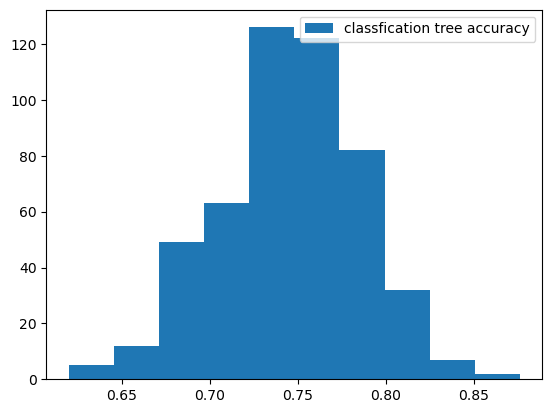

In [66]:
draw_performance_histogram(accuracy_df_class_tree, "classfication tree accuracy")